<a href="https://colab.research.google.com/github/HodaMemar/A3/blob/main/Pivot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists
import seaborn as sns

In [4]:
filename="/content/drive/MyDrive/PaperA3/CUI/CUI__0.csv"
df=pd.read_csv(filename)
df

,Unnamed: 0,HADM_ID,title_span,category_Inner,negex,entity_text,first_cuid,canonical_name,label,CATEGORY,DRG_CODE,GENDER,AGE,CHARTDATE,TAA
0,0,157267,Allergies:,allergies,False,Codeine,C0009214,codeine,CHEMICAL,Discharge summary,391,F,76,2124-09-28 00:00:00,9
1,1,157267,CC:,chief_complaint,False,Emesis,C0042963,Vomiting,DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
2,2,157267,CC:,chief_complaint,False,diarrhea,C0011991,Diarrhea,DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
3,3,157267,CC:,chief_complaint,False,fever,C0015967,Fever,DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
4,4,157267,HPI:,history_of_present_illness,False,ESRD,C0022661,"Kidney Failure, Chronic",DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,99545,186138,Neuro:,neurological,False,solumedrol,C0701466,Solu-Medrol,CHEMICAL,Nursing/other,166,M,66,2195-11-22 00:00:00,29
99546,99546,186138,NaN,NaN,False,FIO2,C0428167,Inspired fraction of oxygen,CHEMICAL,Nursing/other,166,M,66,2195-11-23 00:00:00,30
99547,99547,186138,NaN,NaN,False,acidemia,C0268030,Acidemia,DISEASE,Nursing/other,166,M,66,2195-11-23 00:00:00,30
99548,99548,186138,NaN,NaN,True,PEEP,C0032740,Positive End-Expiratory Pressure,CHEMICAL,Nursing/other,166,M,66,2195-11-23 00:00:00,30


In [17]:
df[['HADM_ID','category_Inner','negex','first_cuid','canonical_name','label']]

,HADM_ID,category_Inner,negex,first_cuid,canonical_name,label
0,157267,allergies,False,C0009214,codeine,CHEMICAL
1,157267,chief_complaint,False,C0042963,Vomiting,DISEASE
2,157267,chief_complaint,False,C0011991,Diarrhea,DISEASE
3,157267,chief_complaint,False,C0015967,Fever,DISEASE
4,157267,history_of_present_illness,False,C0022661,"Kidney Failure, Chronic",DISEASE
...,...,...,...,...,...,...
99545,186138,neurological,False,C0701466,Solu-Medrol,CHEMICAL
99546,186138,NaN,False,C0428167,Inspired fraction of oxygen,CHEMICAL
99547,186138,NaN,False,C0268030,Acidemia,DISEASE
99548,186138,NaN,True,C0032740,Positive End-Expiratory Pressure,CHEMICAL


این تابع برای تفاوت قائل شدن بین مفهوم مثبت و منفی است

In [7]:
def negative(x, y):
        if(x ==True):
            r='not_' + y 
        else:
            r=y
        return r             


#First solution : Integrate all CUI_#
---


برای پیوت کردن یک راه این است که همه فایل های مرحله قبل را ابتدا یکی کنیم و بعد 
وارد مرحله پیوت شویم. ولی این کار باعث کندی بسیار زیاد میشود
امکان موازی سازی هم به راحتی فراهم نیست چون عملیات روی تعدادی از رکورد های پانداس است. 


In [8]:
df = pd.DataFrame(columns=['HADM_ID','category_Inner','negex','first_cuid','canonical_name','label'])
df

,HADM_ID,category_Inner,negex,first_cuid,canonical_name,label


In [ ]:


for i in range(0,76):
  filename="/content/drive/MyDrive/PaperA3/CUI/CUI__"+str(i)+".csv"
  if (exists(filename)==True):
          print(df.shape)
          df1=pd.read_csv(filename)
          df1=df1[['HADM_ID','category_Inner','negex','first_cuid','canonical_name','label']]
          df1['Neg_CUI'] = df1.apply(lambda x: negative(x['negex'], x['first_cuid']), axis=1)          
          df=pd.concat([df, df1])


In [10]:
df

,HADM_ID,category_Inner,negex,first_cuid,canonical_name,label,Neg_CUI
0,157267,allergies,False,C0009214,codeine,CHEMICAL,C0009214
1,157267,chief_complaint,False,C0042963,Vomiting,DISEASE,C0042963
2,157267,chief_complaint,False,C0011991,Diarrhea,DISEASE,C0011991
3,157267,chief_complaint,False,C0015967,Fever,DISEASE,C0015967
4,157267,history_of_present_illness,False,C0022661,"Kidney Failure, Chronic",DISEASE,C0022661
...,...,...,...,...,...,...,...
102090,110075,labs_and_studies,False,C1290344,Nonspecific interstitial pneumonia,DISEASE,C1290344
102091,110075,labs_and_studies,True,C0032227,Pleural effusion disorder,DISEASE,not_C0032227
102092,110075,labs_and_studies,True,C0032326,Pneumothorax,DISEASE,not_C0032326
102093,110075,labs_and_studies,True,C0032326,Pneumothorax,DISEASE,not_C0032326


In [11]:
df.to_csv('/content/drive/MyDrive/PaperA3/CUI/CUI_Total.csv')

خروجی یک فایل از ترکیب همه
مفاهیم
 میشود
البته برای آمار در مقاله مهم است


---
(18075318, 10)

> Indented block




ایچاد دیتاست های مختلف برای تست کردن

(6925686, 7)
(24535, 4)


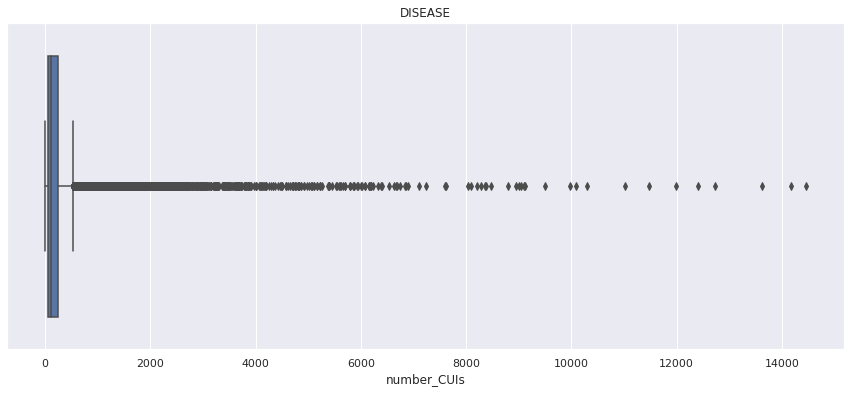

In [79]:
ls_Categories=['chief_complaint',  'history_of_present_illness',  'labs_and_studies',  'past_medical_history', 'physical_exam' ,  'observation_and_plan']
df_disease=df[(df['category_Inner'].isin(ls_Categories)) & (df['label']=='DISEASE')]
print(df_disease.shape)

df_disease_Pivot=df_disease.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_disease_Pivot['term']=[','.join(map(str, l)) for l in df_disease_Pivot['list_CUIs']]
df_disease_Pivot['number_CUIs']=df_disease_Pivot['list_CUIs'].str.len()
print(df_disease_Pivot.shape)
df_disease_Pivot


sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_disease_Pivot['number_CUIs']).set(title='DISEASE')

(24274, 4)


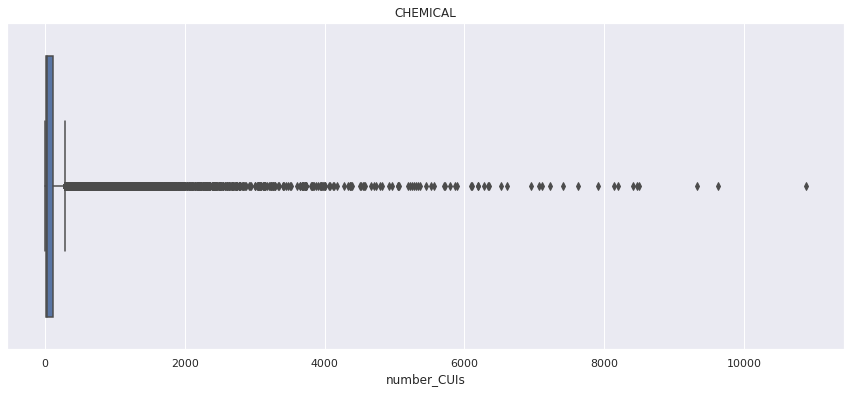

In [80]:
df_CHEMICAL=df[(df['category_Inner'].isin(ls_Categories)) & (df['label']=='CHEMICAL')]
df_CHEMICAL.shape

df_CHEMICAL_Pivot=df_CHEMICAL.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_CHEMICAL_Pivot['term']=[','.join(map(str, l)) for l in df_CHEMICAL_Pivot['list_CUIs']]
df_CHEMICAL_Pivot['number_CUIs']=df_CHEMICAL_Pivot['list_CUIs'].str.len()
print(df_CHEMICAL_Pivot.shape)



sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_CHEMICAL_Pivot['number_CUIs']).set(title='CHEMICAL')

(24542, 4)


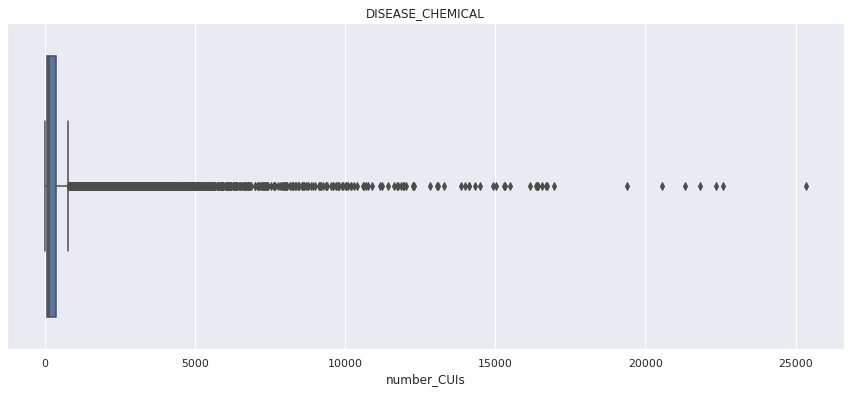

In [81]:
df_DISEASE_CHEMICAL=df[(df['category_Inner'].isin(ls_Categories))]
df_DISEASE_CHEMICAL.shape

df_DISEASE_CHEMICAL_Pivot=df_DISEASE_CHEMICAL.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_DISEASE_CHEMICAL_Pivot['term']=[','.join(map(str, l)) for l in df_DISEASE_CHEMICAL_Pivot['list_CUIs']]
df_DISEASE_CHEMICAL_Pivot['number_CUIs']=df_DISEASE_CHEMICAL_Pivot['list_CUIs'].str.len()
print(df_DISEASE_CHEMICAL_Pivot.shape)



sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_DISEASE_CHEMICAL_Pivot['number_CUIs']).set(title='DISEASE_CHEMICAL')

(20840, 4)


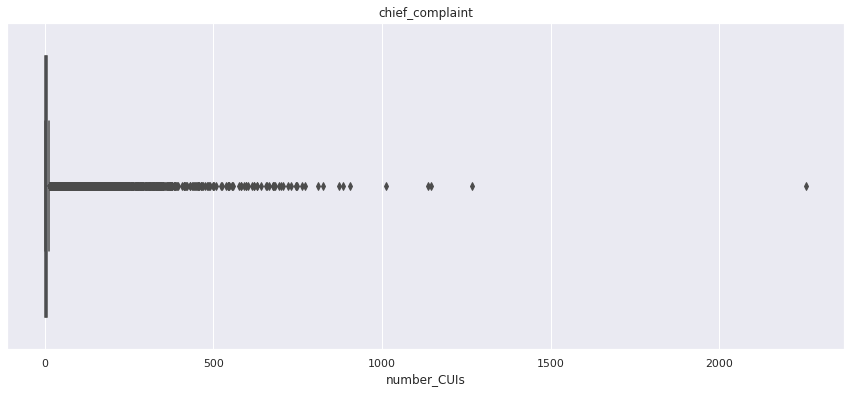

In [84]:
df_chief_complaint=df[(df['category_Inner']=='chief_complaint')]
df_chief_complaint.shape

df_chief_complaint_Pivot=df_chief_complaint.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_chief_complaint_Pivot['term']=[','.join(map(str, l)) for l in df_chief_complaint_Pivot['list_CUIs']]
df_chief_complaint_Pivot['number_CUIs']=df_chief_complaint_Pivot['list_CUIs'].str.len()
print(df_chief_complaint_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_chief_complaint_Pivot['number_CUIs']).set(title='chief_complaint')

(24010, 4)


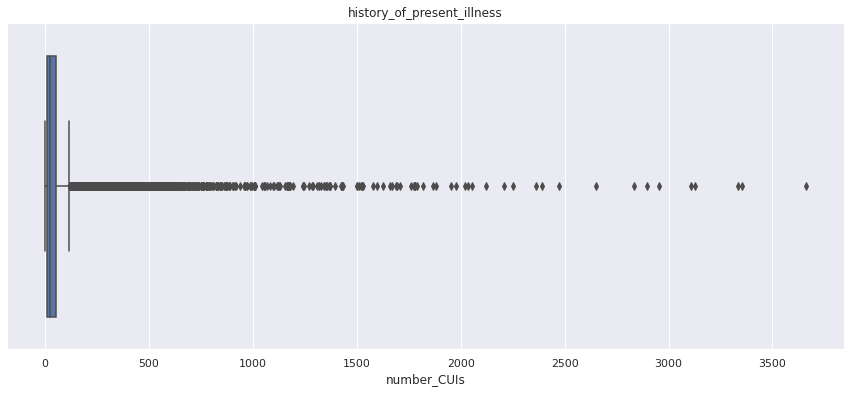

In [83]:
df_history_of_present_illness=df[(df['category_Inner']=='history_of_present_illness')]
df_history_of_present_illness.shape

df_history_of_present_illness_Pivot=df_history_of_present_illness.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_history_of_present_illness_Pivot['term']=[','.join(map(str, l)) for l in df_history_of_present_illness_Pivot['list_CUIs']]
df_history_of_present_illness_Pivot['number_CUIs']=df_history_of_present_illness_Pivot['list_CUIs'].str.len()
print(df_history_of_present_illness_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_history_of_present_illness_Pivot['number_CUIs']).set(title='history_of_present_illness')

(24233, 4)


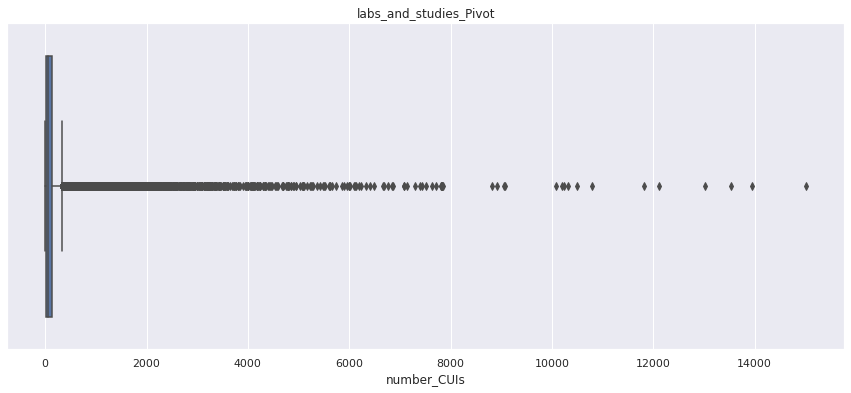

In [85]:
df_labs_and_studies=df[(df['category_Inner']=='labs_and_studies')]
df_labs_and_studies.shape

df_labs_and_studies_Pivot=df_labs_and_studies.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_labs_and_studies_Pivot['term']=[','.join(map(str, l)) for l in df_labs_and_studies_Pivot['list_CUIs']]
df_labs_and_studies_Pivot['number_CUIs']=df_labs_and_studies_Pivot['list_CUIs'].str.len()
print(df_labs_and_studies_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_labs_and_studies_Pivot['number_CUIs']).set(title='labs_and_studies_Pivot')

(24065, 4)


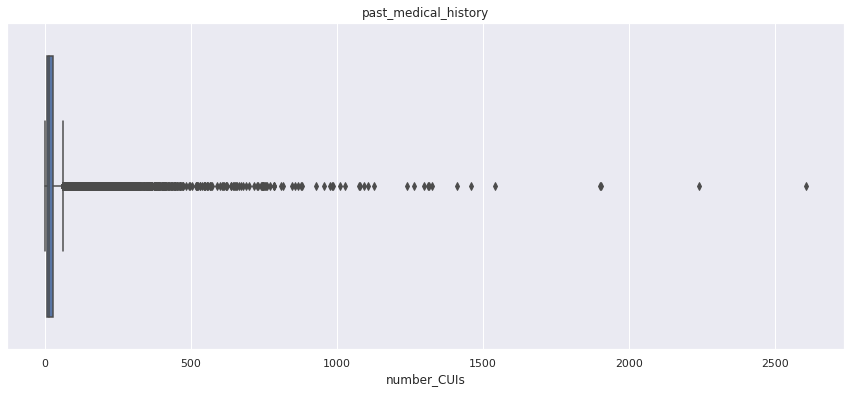

In [86]:
df_past_medical_history=df[(df['category_Inner']=='past_medical_history')]
df_past_medical_history.shape

df_past_medical_history_Pivot=df_past_medical_history.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_past_medical_history_Pivot['term']=[','.join(map(str, l)) for l in df_past_medical_history_Pivot['list_CUIs']]
df_past_medical_history_Pivot['number_CUIs']=df_past_medical_history_Pivot['list_CUIs'].str.len()
print(df_past_medical_history_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_past_medical_history_Pivot['number_CUIs']).set(title='past_medical_history')

(22516, 4)


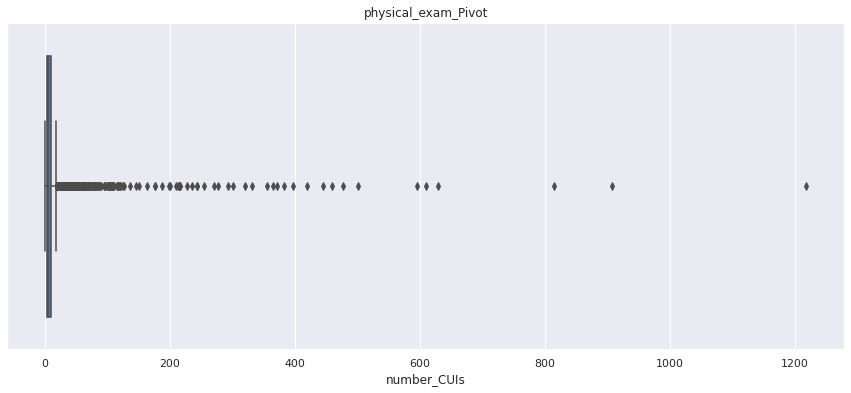

In [87]:
df_physical_exam=df[(df['category_Inner']=='physical_exam')]
df_physical_exam.shape

df_physical_exam_Pivot=df_physical_exam.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_physical_exam_Pivot['term']=[','.join(map(str, l)) for l in df_physical_exam_Pivot['list_CUIs']]
df_physical_exam_Pivot['number_CUIs']=df_physical_exam_Pivot['list_CUIs'].str.len()
print(df_physical_exam_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_physical_exam_Pivot['number_CUIs']).set(title='physical_exam_Pivot')

(23914, 4)


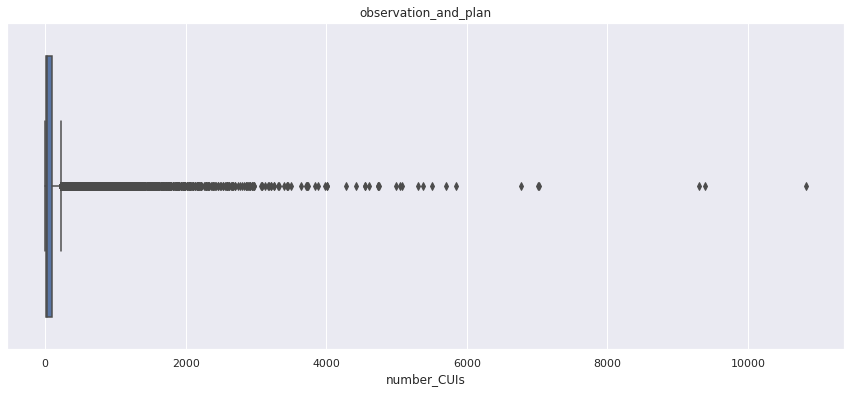

In [88]:

df_observation_and_plan=df[(df['category_Inner']=='observation_and_plan')]
df_observation_and_plan.shape

df_observation_and_plan_Pivot=df_observation_and_plan.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_observation_and_plan_Pivot['term']=[','.join(map(str, l)) for l in df_observation_and_plan_Pivot['list_CUIs']]
df_observation_and_plan_Pivot['number_CUIs']=df_observation_and_plan_Pivot['list_CUIs'].str.len()
print(df_observation_and_plan_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_observation_and_plan_Pivot['number_CUIs']).set(title='observation_and_plan')

In [31]:
df.shape

(17989929, 7)

#Pivot and integrating primary dataset

In [55]:
df_CHEMICAL_Pivot=df_CHEMICAL.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_CHEMICAL_Pivot['term']=[','.join(map(str, l)) for l in df_CHEMICAL_Pivot['list_CUIs']]
df_CHEMICAL_Pivot['len']=df_CHEMICAL_Pivot['term'].str.len()
df_CHEMICAL_Pivot.shape

(24274, 4)

In [56]:
df_CHEMICAL_Pivot

,HADM_ID,list_CUIs,term,len
0,100001,"[C0074722, C0032821, C1314782, C0039328, C0004...","C0074722,C0032821,C1314782,C0039328,C0004057,C...",80
1,100003,"[C0030705, C0027396, C0876139, C0028833, C0017...","C0030705,C0027396,C0876139,C0028833,C0017887,C...",1449
2,100009,"[C0027051, C1428863, C0001905, C0972395, C0030...","C0027051,C1428863,C0001905,C0972395,C0030054,C...",89
3,100010,"[not_C0699142, C0027270]","not_C0699142,C0027270",21
4,100011,"[C0030899, C0017887, C0004749]","C0030899,C0017887,C0004749",26
...,...,...,...,...
24269,199236,"[C0017887, C0000325, C0000325]","C0017887,C0000325,C0000325",26
24270,199336,"[C0022924, C0066005, C0042313, C0699678, C0008...","C0022924,C0066005,C0042313,C0699678,C0008809,C...",2825
24271,199413.0,"[C0031995, C0030842, C0031995, C0052796, C0201...","C0031995,C0030842,C0031995,C0052796,C0201405,C...",134
24272,199743.0,"[C0017887, C0000970, C0023660, C0014518, C0060...","C0017887,C0000970,C0023660,C0014518,C0060926,C...",764


In [ ]:
ls_HADM_ID=df_CHEMICAL.HADM_ID.unique().tolist()
print(len(ls_HADM_ID))
df_tmp=df_CHEMICAL
ls_corpus_Total_Neg=[]
ls_corpus_Total_Pos=[]
for i in ls_HADM_ID:
  ls_Concepts_Neg=[]
  ls_Concepts_Pos=[]
  res_Neg=df_tmp[(df_tmp['HADM_ID']==i)  ].Neg_CUI.tolist()
  #res_Pos=df_tmp[(df_tmp['HADM_ID']==i)  ].first_cuid.tolist()
  ls_res_Neg=list(set(res_Neg))
  #ls_res_Pos=list(set(res_Pos))
  ls_Concepts_Neg=ls_Concepts_Neg + ls_res_Neg
  #ls_Concepts_Pos=ls_Concepts_Pos + ls_res_Pos
  str_res_Neg= ','.join(map(str, list(set(ls_Concepts_Neg))))
  #str_res_Pos= ','.join(map(str, list(set(ls_Concepts_Pos))))
  #print(i,len(list(set(ls_Concepts))),str_res)
  ls_corpus_Total_Neg.append([i,str_res_Neg])
  #ls_corpus_Total_Pos.append([i,str_res_Pos])
  print(len(ls_HADM_ID)-(ls_HADM_ID.index(i)+1))

In [41]:
df_CHEMICAL_Pivot=pd.DataFrame(ls_corpus_Total_Neg,columns=['label','term'])
df_CHEMICAL_Pivot['len']= df_CHEMICAL_Pivot['term'].str.len()
df_CHEMICAL_Pivot['list_CUIs'] = df_CHEMICAL_Pivot['term'].str.split(',')
df_CHEMICAL_Pivot

,label,term,len,list_CUIs
0,157267,"C0019552,C0972395,not_C0019552,C0008574,C06996...",111,"[C0019552, C0972395, not_C0019552, C0008574, C..."


In [ ]:
def pivot(Pi , cat):
 tmp=df[(df['HADM_ID']==Pi ) & (df['category_Inner']==cat )]
 return [Pi,cat ,tmp.first_cuid.values.tolist()  ,tmp.canonical_name.values.tolist()  ,tmp.Neg_CUI.values.tolist()]

In [ ]:
%%time

ls_patient=df.HADM_ID.unique()
          
FormName=''

ls_Category_Section=[]

for i in range(len(ls_patient)):
        try:
            ls_category=df[(df['HADM_ID']==ls_patient[i] )].category_Inner.dropna().unique().tolist()
            
            Pi=ls_patient[i]
            for j in  range(len(ls_category)):
                #FormName=df[(df['HADM_ID']==ls_patient[i] ) & (df['category_Inner']==ls_category[j] )].CATEGORY.unique()
                #print(FormName)
                cat=ls_category[j]
                ls_Category_Section.append(pivot(Pi , cat))
        except:     
          print(i,ls_patient[i])   



CPU times: user 56.7 s, sys: 134 ms, total: 56.8 s
Wall time: 56.7 s


یک نمونه فایل اینجا نشان داده شده است

In [11]:
filename='/content/drive/MyDrive/PaperA3/CUI/CUI__77.csv'
df=pd.read_csv(filename)

In [12]:
df.shape

(85389, 9)

In [13]:
df.head()

,Unnamed: 0,HADM_ID,title_span,category_Inner,negex,entity_text,first_cuid,canonical_name,label
0,0,167853.0,Allergies:,allergies,False,Flagyl,C0699678,Flagyl,CHEMICAL
1,1,167853.0,Chief Complaint:,chief_complaint,False,Abdominal Pain,C0000737,Abdominal Pain,DISEASE
2,2,167853.0,Chief Complaint:,chief_complaint,False,Heparin,C0019134,heparin,CHEMICAL
3,3,167853.0,Chief Complaint:,chief_complaint,False,pulmonary\nembolus,C0034065,Pulmonary Embolism,DISEASE
4,4,167853.0,HPI:,history_of_present_illness,False,pain,C0030193,Pain,DISEASE


اینجا مفاهیم منفی پردازش شده و در یک ستون جدا ذحیره میشود

In [21]:
df['Neg_CUI'] = df.apply(lambda x: negative(x['negex'], x['first_cuid']), axis=1)

In [15]:
df.shape

(85389, 10)

In [16]:
df.columns

Index(['Unnamed: 0', 'HADM_ID', 'title_span', 'category_Inner', 'negex',
       'entity_text', 'first_cuid', 'canonical_name', 'label', 'Neg_CUI'],
      dtype='object')

In [22]:
df.loc[df['negex']==True]

,Unnamed: 0,HADM_ID,title_span,category_Inner,negex,entity_text,first_cuid,canonical_name,label,Neg_CUI
5,5,167853.0,HPI:,history_of_present_illness,True,pain,C0030193,Pain,DISEASE,not_C0030193
6,6,167853.0,HPI:,history_of_present_illness,True,pain,C0030193,Pain,DISEASE,not_C0030193
14,14,167853.0,PHYSICAL EXAM:,physical_exam,True,murmurs,C0018808,Heart murmur,DISEASE,not_C0018808
15,15,167853.0,PHYSICAL EXAM:,physical_exam,True,TTP,C0034155,"Purpura, Thrombotic Thrombocytopenic",DISEASE,not_C0034155
16,16,167853.0,PHYSICAL EXAM:,physical_exam,True,venous disease,C0235522,Disorder of vein,DISEASE,not_C0235522
...,...,...,...,...,...,...,...,...,...,...
85273,85273,109873.0,Brief Hospital Course:,hospital_course,True,seizures,C0036572,Seizures,DISEASE,not_C0036572
85298,85298,109873.0,Brief Hospital Course:,hospital_course,True,UTI,C0042029,Urinary tract infection,DISEASE,not_C0042029
85316,85316,109873.0,Brief Hospital Course:,hospital_course,True,hypotension,C0020649,Hypotension,DISEASE,not_C0020649
85387,85387,109873.0,medications:,medications,True,Vancomycin,C0042313,vancomycin,CHEMICAL,not_C0042313


In [ ]:
ls_Category_Section[0]

[167853.0,
 'allergies',
 ['C0699678', 'C0699678'],
 ['Flagyl', 'Flagyl'],
 ['C0699678', 'C0699678']]

In [ ]:
dt=pd.DataFrame(ls_Category_Section,columns=['HADM_ID','category_Inner','CUI','canonical_name','Neg_CUI'])
dt.to_csv('/content/drive/MyDrive/PaperA3/Processed/processed_77.csv')

In [ ]:
ls_patient=dt.HADM_ID.unique()
print("Number of Patients:  " + str(len(ls_patient)) + ",   Number of records:  " + str(len(dt)))

Number of Patients:  2436,   Number of records:  9469
